@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Customer Churn Analysis


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 


### Task

Need to examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

#### Extracting Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
data   #display the datset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#To check our dataset dimensions

data.shape

(7043, 21)

In [5]:
#Check data column names

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Checking the DataTypes of each Column

In [6]:
data.info()  #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- There are 18 Categorical datatype columns and 3 integer/float datatype columns

In [7]:
data.columns  #To display the column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Categorical Datatype Columns:

- `customerID`

- `gender`

- `Partner`

- `Dependents`

- `PhoneService`

- `MultipleLines`

- `InternetService`

- `OnlineSecurity`

- `OnlineBackup`

- `DeviceProtection`

- `TechSupport`

- `StreamingTV`

- `StreamingMovies`

- `Contract`

- `PaperlessBilling`

- `PaymentMethod`

- `TotalCharges`

- `Churn`


#### Checking and Treating Missing Values

In [8]:
data.isna().sum()  #To check the total null values in all the columns individually

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

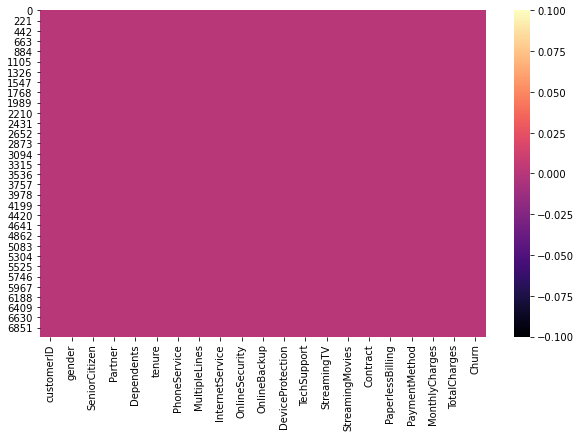

In [9]:
#Plot null values to check if any

plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='magma')
plt.show()

##### Our dataset contains no null values. Hence, let's proceed further

In [10]:
data.nunique()


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### Observation:

- "CustomerID" has 7043 unique values hence we can say that it is unique to each customer(each row) and can be dropped.
- Our target variable: "Churn" has only 2 unique values, Identifying its a classification problem


In [11]:
#To remove the "customerID" column

data.drop(['customerID'],axis=1,inplace=True)

In [12]:
# "TotalCharges" are in object datatype let's convert it into float datatype(as it contains the continuous data)

data['TotalCharges']=data['TotalCharges'].replace(r'\s+',np.nan,regex=True)
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])

In [13]:
data['TotalCharges'].dtype  #to recheck the datatype

dtype('float64')

- "TotalCharges" column is now converted to float datatype

In [14]:
#Let's recheck the null values once again

data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
#To fill nan values by replacing with "0"

data["TotalCharges"].fillna(0,inplace=True) 

data["TotalCharges"].isnull().sum()  #let's check the null values if any

0

In [16]:
data.describe()  #To get the statistical calculation/information of each data columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis (EDA)

Let us explore our dataset features and visualize it

### Univariate Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


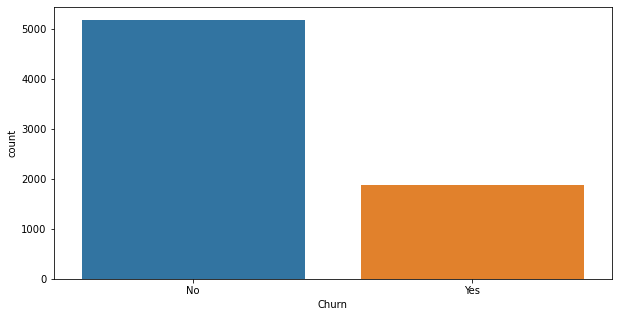

In [17]:
print(data['Churn'].value_counts())

plt.figure(figsize = [10,5])
sns.countplot(x='Churn',data=data)
plt.show()

Male      3555
Female    3488
Name: gender, dtype: int64


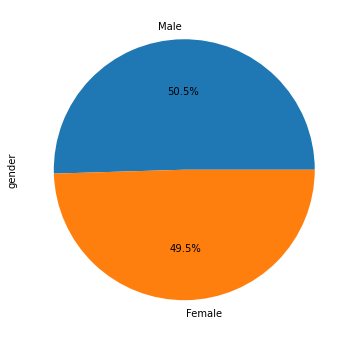

In [18]:
print(data['gender'].value_counts())

data['gender'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%')
plt.show()

- The data is almost equally distributed among the total numbr of Males and Females.

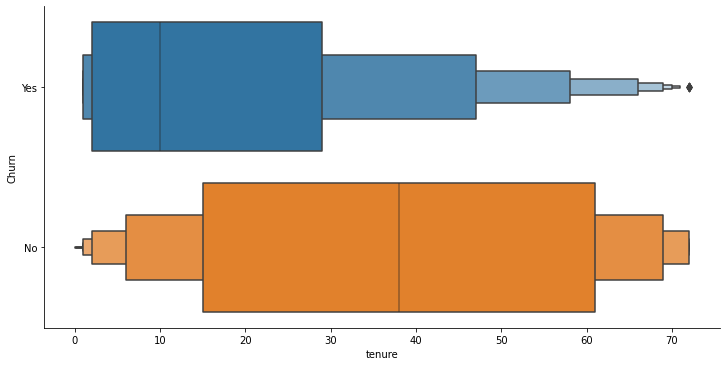

In [19]:
sns.catplot(y = 'Churn', x = 'tenure',data= data.sort_values("Churn", ascending = False), 
            kind = "boxen", height = 5, aspect = 2)

plt.tight_layout
plt.show()

<AxesSubplot:>

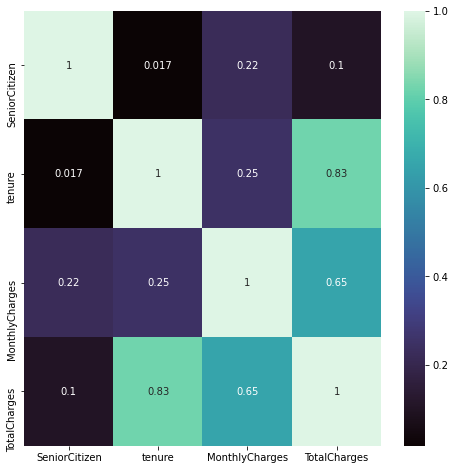

In [20]:
corr=data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='mako')

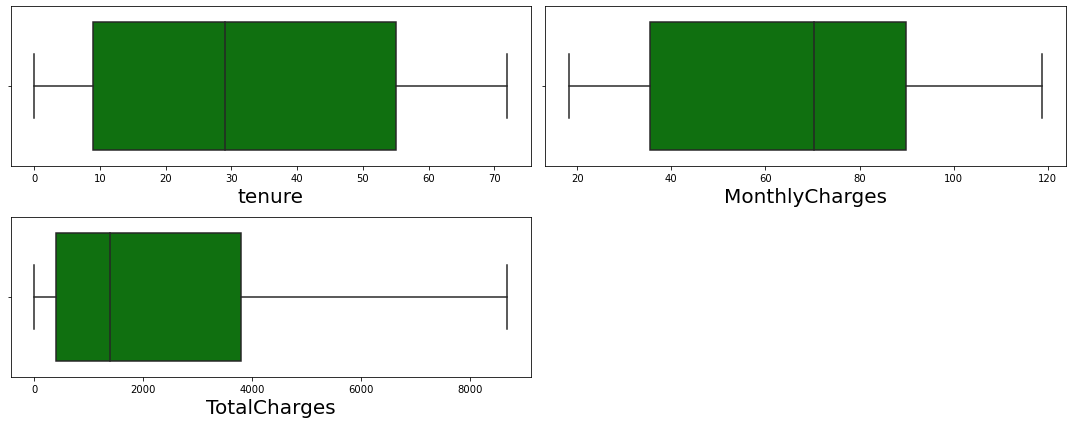

In [21]:
#Let's check if there is any outliers present in our data columns by using box plot method

features = ['tenure','MonthlyCharges','TotalCharges']

plt.figure(figsize = (15,23))
plotnumber = 1

for i in features: #let's visualize only the features columns 
    if plotnumber<=16:
        ax = plt.subplot(8,2,plotnumber)
        sns.boxplot(data[i],color = 'Green')
        plt.xlabel(i,fontsize = 20)
    plotnumber += 1
plt.tight_layout()

- As per the above graph, we don't have outliers

In [22]:
#Let's check the skewness for these columns

data[features].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

- Skewness is present in "TotalCharges" column, we need to remove it

##### Let's use Power Transformation method to remove the skewness for this particular column

In [23]:
from sklearn.preprocessing import PowerTransformer #importing the library

scaler = PowerTransformer(method='yeo-johnson')
    
#applying Power Transformation method for this particular column
data['TotalCharges'] = scaler.fit_transform(data['TotalCharges'].values.reshape(-1,1)) 

In [24]:
#Let's re-check the skewness for these columns

data[features].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.146121
dtype: float64

- The skewness is removed

In [25]:
#To check the correlation between the features
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.106992
tenure,0.016567,1.000000,0.247900,0.867401
MonthlyCharges,0.220173,0.247900,1.000000,0.618459
TotalCharges,0.106992,0.867401,0.618459,1.000000


#### Observation:

- Amost the correlation is not very much high between features.
- Still we could see: "TotalCharges" and "tenure" are largely correlated with "0.867401"


## Encoding the Categorical Columns

In [26]:
#Let's check the unique data values for each data column so that we can proceed further with data encoding features 
#and other features for our data columns

for item in data.columns:
    print(item,'\n')
    print(data[item].unique())
    print('-'*100,'\n')

gender 

['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

SeniorCitizen 

[0 1]
---------------------------------------------------------------------------------------------------- 

Partner 

['Yes' 'No']
---------------------------------------------------------------------------------------------------- 

Dependents 

['No' 'Yes']
---------------------------------------------------------------------------------------------------- 

tenure 

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
---------------------------------------------------------------------------------------------------- 

PhoneService 

['No' 'Yes']
---------------------------------------------------------------------------------------------------- 

MultipleLines 

['No ph

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
df1 = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','OnlineSecurity','OnlineBackup',
       'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn','MultipleLines']

for i in df1:
    data[i]=le.fit_transform(data[i])

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,DSL,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,-1.792996,0
1,1,0,0,0,34,1,0,DSL,2,0,2,0,0,0,One year,0,Mailed check,56.95,0.254809,0
2,1,0,0,0,2,1,0,DSL,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,-1.375173,1
3,1,0,0,0,45,0,1,DSL,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,0.233807,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,-1.239490,1


In [30]:
print(data["InternetService"].unique())

['DSL' 'Fiber optic' 'No']


In [31]:
Internet_Service=data[["InternetService"]]  
Internet_Service= pd.get_dummies(Internet_Service) #Get dummies for the Internet_Service Column

Internet_Service.head() #display the dummies available

,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [32]:
print(data["Contract"].unique())

['Month-to-month' 'One year' 'Two year']


In [33]:
contract=data[["Contract"]]  
contract= pd.get_dummies(contract) #Get dummies for the Contract Column

contract.head() #display the dummies available

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [34]:
print(data["PaymentMethod"].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [35]:
Payment_Method=data[["PaymentMethod"]]  
Payment_Method= pd.get_dummies(Payment_Method) #Get dummies for the "PaymentMethod" Column

Payment_Method.head() #display the dummies available

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [36]:
# Concatenate dataframe with the above extracted dummies

# (data + InternetService + Contract + PaymentMethod)

data = pd.concat([data,Internet_Service,contract,Payment_Method],axis=1)

#let's drop the original columns as dummies have been extracted

data = data.drop(columns = ['InternetService','Contract','PaymentMethod'])

data.head() #To display the new dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,2,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,2,0,2,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,2,2,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,2,0,2,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [37]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

<AxesSubplot:>

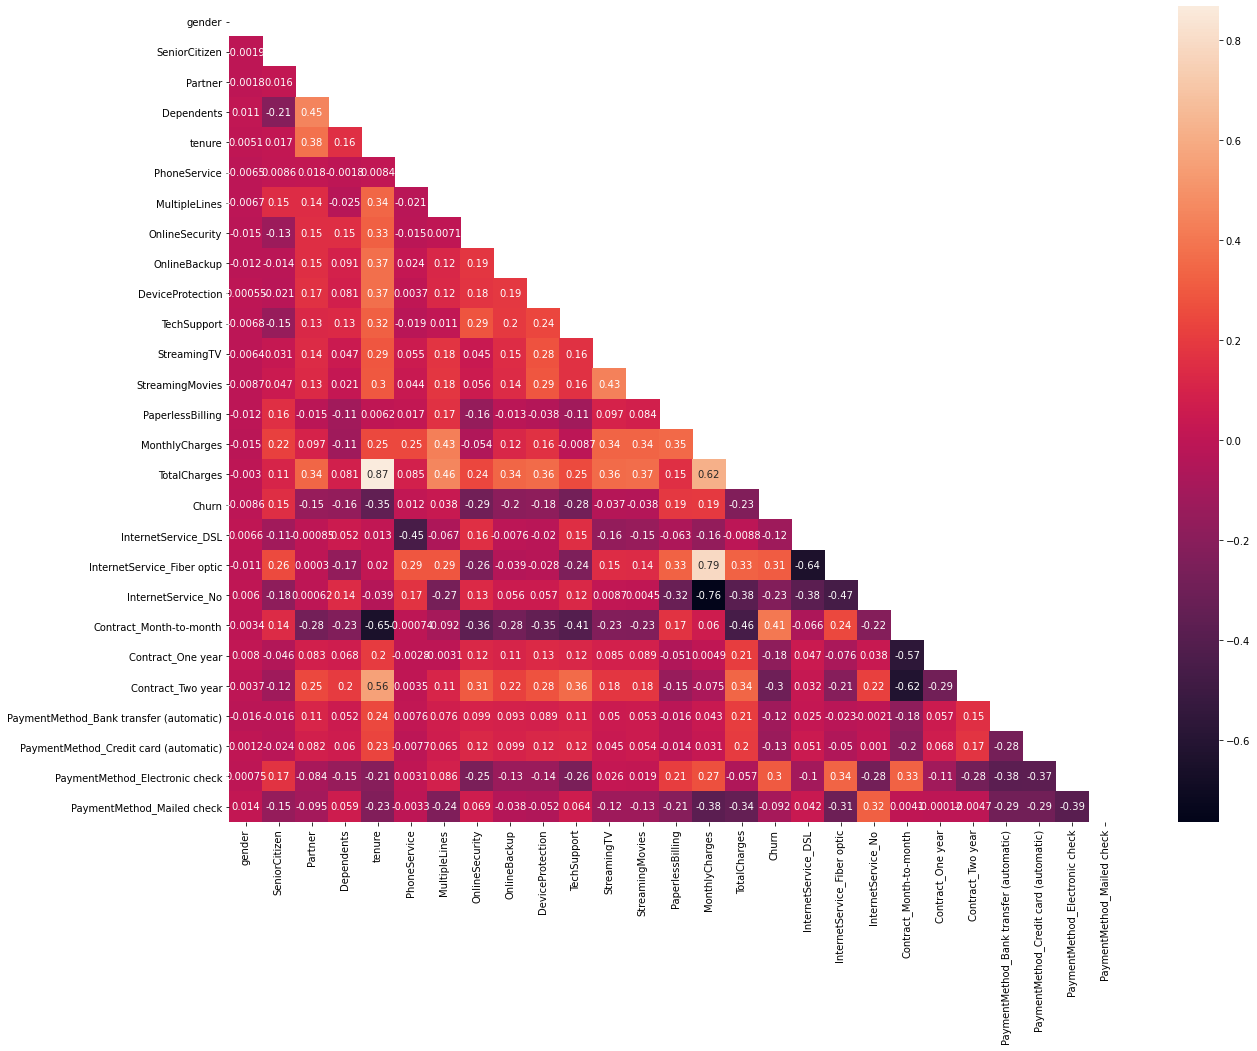

In [76]:
#correlation matrix
plt.figure(figsize=(20,15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

### Splitting Features and Labels


In [38]:
X = data.drop(columns = 'Churn')
Y = data['Churn']

### Over_Sampling the imbalanced target column

In [39]:
# Handiling the class having imbalance using SMOTE

from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

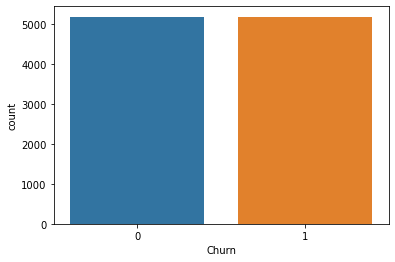

In [41]:
sns.countplot(Y_over)
plt.show()

- After applying "Over Sampling Method", the target column "Churn" data class is now balanced

### Scaling
- We could see that there is a huge difference in data range between different columns data in our dataset. Hence, we need to scale the data.

let's use StandardScaler method to normalize the data

In [42]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

### Finding Best Random State
- Let's find out the best Random State which can be used for all our models

In [43]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.8579710144927536  with Random State  92


### Splitting train and test data

In [44]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20, random_state=maxAcc) 

y_train.sample(5)

7036     0
10113    1
5519     0
9629     1
6770     0
Name: Churn, dtype: int32

## MODEL BUILDING:


In [52]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score,roc_auc_score,roc_curve,auc

import scikitplot as skplt

LogisticRegression() 

Accuracy Score: 0.8579710144927536
Avg_Cross_Validation Score:  0.8277070068155868
Precision:  0.8565656565656565
Recall:  0.848
F1 score:  0.8522613065326632

 ROC_AUC_SCORE :  0.857644859813084


<Figure size 1080x432 with 0 Axes>

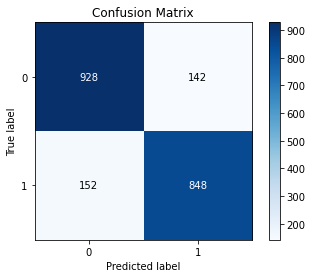

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1070
           1       0.86      0.85      0.85      1000

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

------------------------------------------------------------------------------------------------------------------------ 

RandomForestClassifier() 

Accuracy Score: 0.8729468599033816
Avg_Cross_Validation Score:  0.8480978231683256
Precision:  0.8588120740019474
Recall:  0.882
F1 score:  0.8702516033547114

 ROC_AUC_SCORE :  0.8732429906542056


<Figure size 1080x432 with 0 Axes>

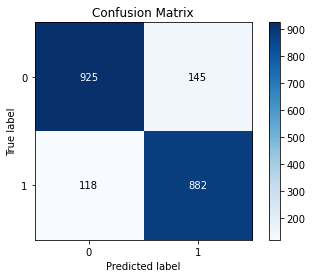

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1070
           1       0.86      0.88      0.87      1000

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070

------------------------------------------------------------------------------------------------------------------------ 

KNeighborsClassifier() 

Accuracy Score: 0.8299516908212561
Avg_Cross_Validation Score:  0.8114691454015219
Precision:  0.7945454545454546
Recall:  0.874
F1 score:  0.8323809523809524

 ROC_AUC_SCORE :  0.831392523364486


<Figure size 1080x432 with 0 Axes>

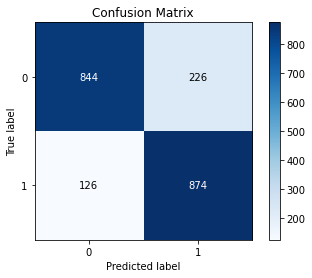

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1070
           1       0.79      0.87      0.83      1000

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

------------------------------------------------------------------------------------------------------------------------ 

GradientBoostingClassifier() 

Accuracy Score: 0.8541062801932368
Avg_Cross_Validation Score:  0.8280929665664992
Precision:  0.8336520076481836
Recall:  0.872
F1 score:  0.8523949169110459

 ROC_AUC_SCORE :  0.8546915887850467


<Figure size 1080x432 with 0 Axes>

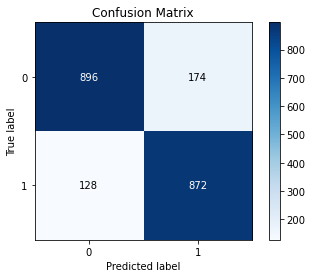

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1070
           1       0.83      0.87      0.85      1000

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070

------------------------------------------------------------------------------------------------------------------------ 

SVC() 

Accuracy Score: 0.8594202898550725
Avg_Cross_Validation Score:  0.8271277636516043
Precision:  0.8411934552454283
Recall:  0.874
F1 score:  0.85728298185385

 ROC_AUC_SCORE :  0.8598971962616823


<Figure size 1080x432 with 0 Axes>

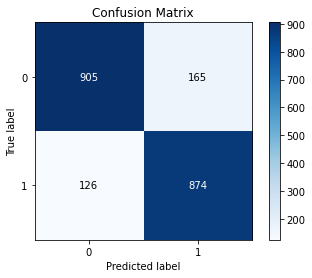

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1070
           1       0.84      0.87      0.86      1000

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

------------------------------------------------------------------------------------------------------------------------ 



In [58]:
lr=LogisticRegression()
#dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier() 
#ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
svc=SVC()


models=[lr,rf,kn,gb,svc]
#kf1 = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
cv=[]

for m in models:
    m = m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=accuracy_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=accuracy_score(y_test,pred_test)
    test.append(test_score*100)

    print(m,'\n')
    print("Accuracy Score:",accuracy_score(y_test,pred_test))
    score = (cross_val_score(m,X_scaled,Y_over,cv=5)).mean()
    print('Avg_Cross_Validation Score: ',score)
    cv.append(score*100)

    precision = precision_score(y_test,pred_test)
    print('Precision: ', precision)
    recall = recall_score(y_test,pred_test)
    print('Recall: ', recall)
    f1 = f1_score(y_test,pred_test)
    print('F1 score: ', f1)    

    fpr,tpr,thresholds=roc_curve(y_test,pred_test)
    roc_auc = auc(fpr,tpr)
    print("\n","ROC_AUC_SCORE : ",roc_auc)
    plt.figure(figsize=[15,6])
    skplt.metrics.plot_confusion_matrix(y_test,pred_test)
    plt.show()
          
    print(classification_report(y_test,pred_test))      
    print('-'*120,'\n')
    
    
Overall_score={'Model':['Logistic Regression','RandomForestClassifier',
                         'KNeighborsClassifier','GradientBoostingClassifier','SVC'],
             'Training Score':train,
            'Test Score':test,
            'Cross Validation Score': cv}
Overall_score=pd.DataFrame(data=Overall_score)

Let's check the overall scores

In [59]:
Overall_score

,Model,Training Score,Test Score,Cross Validation Score
0,Logistic Regression,83.727954,85.797101,82.770701
1,RandomForestClassifier,99.842957,87.294686,84.809782
2,KNeighborsClassifier,86.941290,82.995169,81.146915
3,GradientBoostingClassifier,84.730611,85.410628,82.809297
4,SVC,85.370863,85.942029,82.712776


In [60]:
#Let's get a new column, that shows the difference between Prediction Test Accuracy Score and Cross Validation Score


Overall_score['Difference'] = Overall_score['Test Score'] - Overall_score['Cross Validation Score']

In [61]:
Overall_score

,Model,Training Score,Test Score,Cross Validation Score,Difference
0,Logistic Regression,83.727954,85.797101,82.770701,3.026401
1,RandomForestClassifier,99.842957,87.294686,84.809782,2.484904
2,KNeighborsClassifier,86.941290,82.995169,81.146915,1.848255
3,GradientBoostingClassifier,84.730611,85.410628,82.809297,2.601331
4,SVC,85.370863,85.942029,82.712776,3.229253


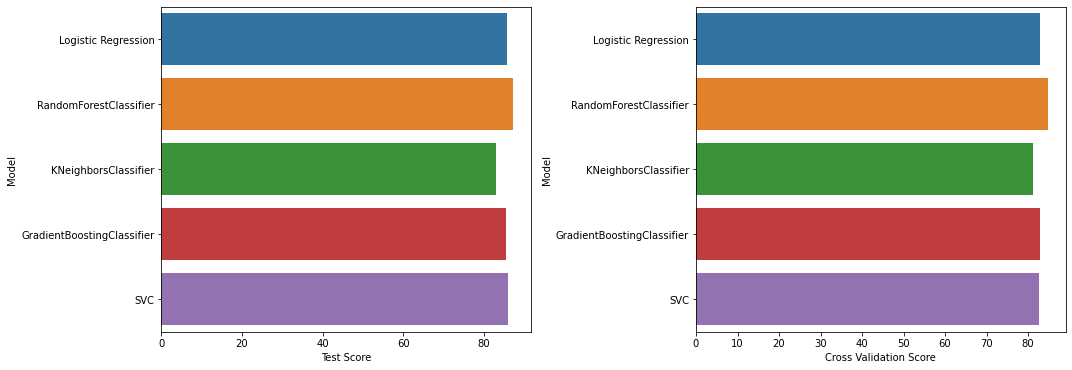

In [87]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'Test Score', y = 'Model', data = Overall_score)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross Validation Score', y = 'Model', data = Overall_score)
plt.tight_layout()
plt.show()

Here, "RandomForestClassifier" model is with high Accuracy score, let's calculate the minimum difference between their Accuracy and cross validation score

In [62]:
Overall_score['Difference'].min()

1.848254541973418

In [81]:
#Let's check the row that has the least difference value in "Difference Column"

Overall_score[Overall_score['Difference']==1.848254541973418]

,Model,Training Score,Test Score,Cross Validation Score,Difference
2,KNeighborsClassifier,86.94129,82.995169,81.146915,1.848255




If we check the remaining model, we see "KNeighborsClassifier" with low difference between "Accuracy Score" and "Cross_Validation_Score"

## "KNeighborsClassifier" is our best model with 82.99% accuracy score

Let's Hyper tune our model to increase the accuracy score

### Hyper Tuning

In [63]:
#Importing library
from sklearn.model_selection import GridSearchCV

param_grid={'algorithm': ['kd_tree', 'brute'],'leaf_size': [15, 18, 20,25,30],'n_neighbors': [3, 5, 7, 13],
            'weights':['uniform', 'distance'],'metric':['euclidean','manhattan','minkowski','chebyshev']}

gridsearch=GridSearchCV(estimator=kn,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20, 25, 30],
                         'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': [3, 5, 7, 13],
                         'weights': ['uniform', 'distance']})

In [64]:
print(gridsearch.best_score_, gridsearch.best_params_)  #Best Parameters

0.8158979523329977 {'algorithm': 'kd_tree', 'leaf_size': 15, 'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


In [65]:
KNN = KNeighborsClassifier(algorithm='kd_tree',leaf_size=15,n_neighbors=13 ,weights = 'distance',metric = 'manhattan')
KNN.fit(x_train,y_train)      #Train the data
y_pred = KNN.predict(x_test)  #Predict the test data

### Performance Metrics

In [66]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print('Cross_Validation Score: ',cross_val_score(KNN,X_scaled,Y_over,cv=5).mean())

Accuracy Score: 0.8454106280193237
Cross_Validation Score:  0.825868035854797


Our model score increased by 0.0154589372 %

## Our model is now ready to predict the "Customer_Churn" with "84.54 %" accuracy Score

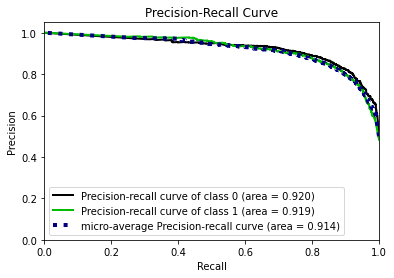

In [67]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a knn classifier after tuning. We'll generate probabilities on the test set.
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()

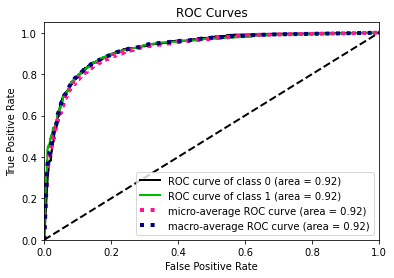

In [68]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a knn classifier. We'll generate probabilities on the test set.
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_roc(y_test, probas)

plt.show()

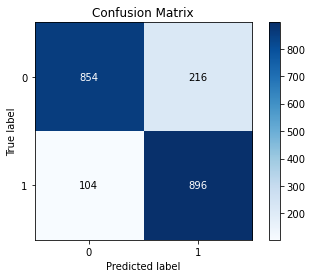

In [69]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1070
           1       0.81      0.90      0.85      1000

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



### Saving Model for Future Predictions

In [71]:
import joblib
joblib.dump(KNN,'Customer_Churn_Model.obj')

['Customer_Churn_Model.obj']

### Make the predictions using the saved model

In [73]:
#Load the saved model

loaded_model = joblib.load(open('Customer_Churn_Model.obj','rb'))

In [74]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = loaded_model.score(x_test,y_test) 

# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Predictions = loaded_model.predict(x_test)

Predictions

Test score: 84.54 %


array([1, 0, 0, ..., 1, 1, 0])

In [82]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = loaded_model.score(x_test,y_test) 

# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Predictions = loaded_model.predict(x_test)

Predictions

Test score: 84.54 %


array([1, 0, 0, ..., 1, 1, 0])

    Our model is "82.51 %" accurate for finding the test data predictions

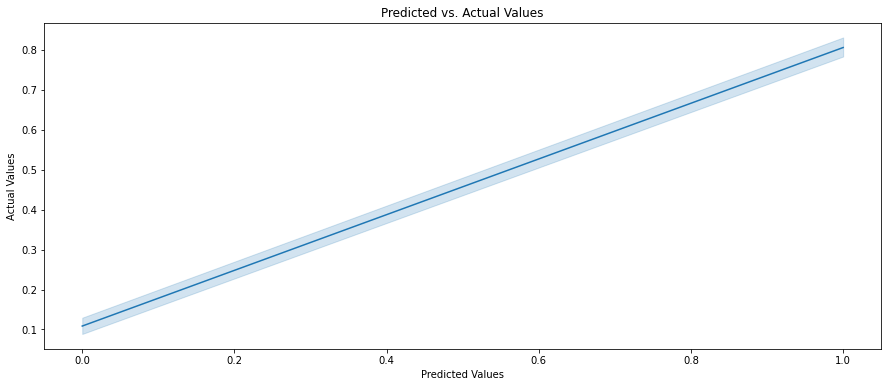

In [75]:
#plot predicted vs. actual values

plt.figure(figsize=[15,6])
sns.lineplot(x=Predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [83]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(y_test, Predictions))
Result = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted'])

In [84]:
pd.set_option ('display.max_rows', None)  #to display maximum rows

Result

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,1,0
9,0,0


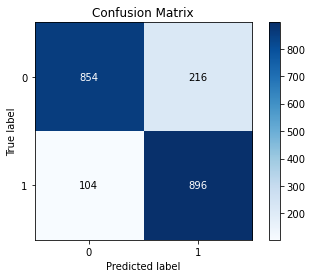

In [85]:
skplt.metrics.plot_confusion_matrix(y_test,Predictions)
plt.show()

In [86]:
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1070
           1       0.81      0.90      0.85      1000

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



-------------

## Our Model is now ready to analyise the "Customer Churn" possibility with 84.54 % accuracy

-------------